# Author : Adeethi Ajithkumar
**@The Sparks internship**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from sklearn.cluster import KMeans    #module for kmeans clustering
from sklearn.preprocessing import MinMaxScaler

In [5]:
#load the iris data
df=pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Find k and determine the elbow point

Text(0, 0.5, 'SSE')

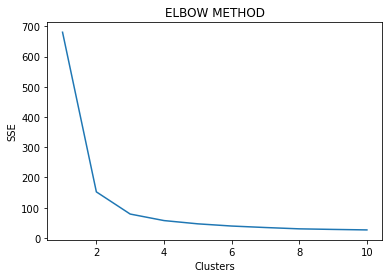

In [6]:
#find the value of k i.e the number of clusters through elbow method

data=df.iloc[:,[1,2,3,4]].values  #only take the values which are in the 2,3,4 and 5th column

sse=[] #sum of square errors of all k values

for i in range(1,11):
    kmean=KMeans(n_clusters=i, max_iter=300)
    kmean.fit(data)
    sse.append(kmean.inertia_)       #sse is the sum of difference between the centroid of cluster and data points

#now plot the sse vs cluster to determine the elbow point

pt.plot(range(1,11),sse)
pt.title("ELBOW METHOD")
pt.xlabel("Clusters")
pt.ylabel("SSE")

# from interpreting the above graph , we can take the k value as 3
# now applying the k value to form clusters

In [22]:


km=KMeans(n_clusters=3,max_iter=300,random_state=0)
cluster_predict=km.fit_predict(data)


# Visualising the clusters - On the first  column and the last column

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


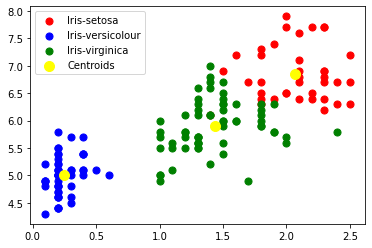

In [24]:

pt.scatter(data[cluster_predict == 0, 3], data[cluster_predict == 0, 0], 
            s = 50, c = 'red', label = 'Iris-setosa')
pt.scatter(data[cluster_predict == 1, 3], data[cluster_predict == 1, 0], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
pt.scatter(data[cluster_predict== 2, 3], data[cluster_predict== 2, 0],
            s = 50, c = 'green', label = 'Iris-virginica')
print(km.cluster_centers_)
# Plotting the centroids of the clusters
pt.scatter(km.cluster_centers_[:, 3], km.cluster_centers_[:,0], 
            s = 100, c = 'yellow', label = 'Centroids')

pt.legend()